# Example 1: Qiskit VQE calculation on water

In this example, we will demonstrate how to use `qc2` in conjunction with `Qiskit-Nature` for conducting a simple VQE run on water molecule.
We utilize the `VQE` class as implemented in `qc2`'s algorithms package along with `Qiskit` `Estimator` primitive to calculate the exact expectation values using `StateVector`.

### Import required packages

In [1]:
# ASE molecule object
from ase.build import molecule

# Qiskit-related packages
from qiskit_algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator

# ignore package import warnings
import warnings
warnings.filterwarnings('ignore')

# qc2 packages
from qc2.data import qc2Data
from qc2.ase import PySCF
from qc2.algorithms.utils import ActiveSpace
from qc2.algorithms.qiskit import VQE

### Instantiate `qc2Data` class and run qc2-ASE calculator

In [2]:
# set Atoms object
mol = molecule('H2O')

# instantiate qc2Data class
qc2data = qc2Data(
    molecule=mol,
    filename='h2o.fcidump',
    schema='fcidump'
)

# specify the qchem calculator
qc2data.molecule.calc = PySCF(method='scf.RHF', basis='sto-3g')

# run calculation and save qchem data in the hdf5 file
qc2data.run()

* Reference energy (Hartree): -74.9644048239943
* Saving qchem data in h2o.fcidump



This generates a `h2o.fcidump` file containing all relevant qchem data according to `FCIDump` data format. To check the its content, run the following command in your shell:

In [3]:
!cat h2o.fcidump

 &FCI NORB=   7,NELEC=10,MS2=0,
  ORBSYM=1,1,1,1,1,1,1,
  ISYM=1,
 &END
 4.744698428255592    1    1    1    1
 -0.4173800898849752    1    1    2    1
 1.005211918627975    1    1    2    2
 0.7971148584938965    1    1    3    3
 -0.1830679567998194    1    1    4    1
 0.1307548586916885    1    1    4    2
 0.9947114361358266    1    1    4    4
 1.115338088402927    1    1    5    5
 -0.2346877760095918    1    1    6    1
 0.3054358577503106    1    1    6    2
 4.849365429112798e-15    1    1    6    3
 -0.2236262384530495    1    1    6    4
 0.8020591161419615    1    1    6    6
 3.001597269643609e-15    1    1    7    1
 -3.79570366054821e-15    1    1    7    2
 0.3627647940282153    1    1    7    3
 3.406870408020704e-15    1    1    7    4
 0.865905577454096    1    1    7    7
 -0.4173800898849752    2    1    1    1
 0.05834680472960329    2    1    2    1
 -0.01312418976546786    2    1    2    2
 -0.004422553508655442    2    1    3    3
 0.0225570184748541    2    1

### Instantiate `qc2.algorithms.VQE` class

In [4]:
# set up activate space
active_space = ActiveSpace(
    num_active_electrons=(2, 2),  # => (n_alpha, n_beta)
    num_active_spatial_orbitals=3 # => active orbitals comprise of only 2px, 2py and 2pz of oxigen
)

# instantiate VQE class
qc2data.algorithm = VQE(
    active_space=active_space,
    mapper="bk",                  # => Bravyi-Kitaev mapper
    optimizer=SLSQP(),            # => from SLSQP optimizer from Qiskit-Algorithms
    estimator=Estimator()         # => Estimator primitive from Qiskit
)

### Check reference state and ansatz

* Reference state:


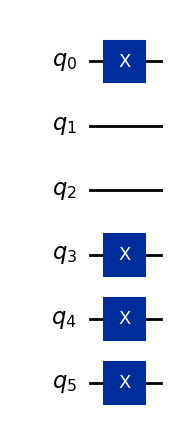

* Ansatz:


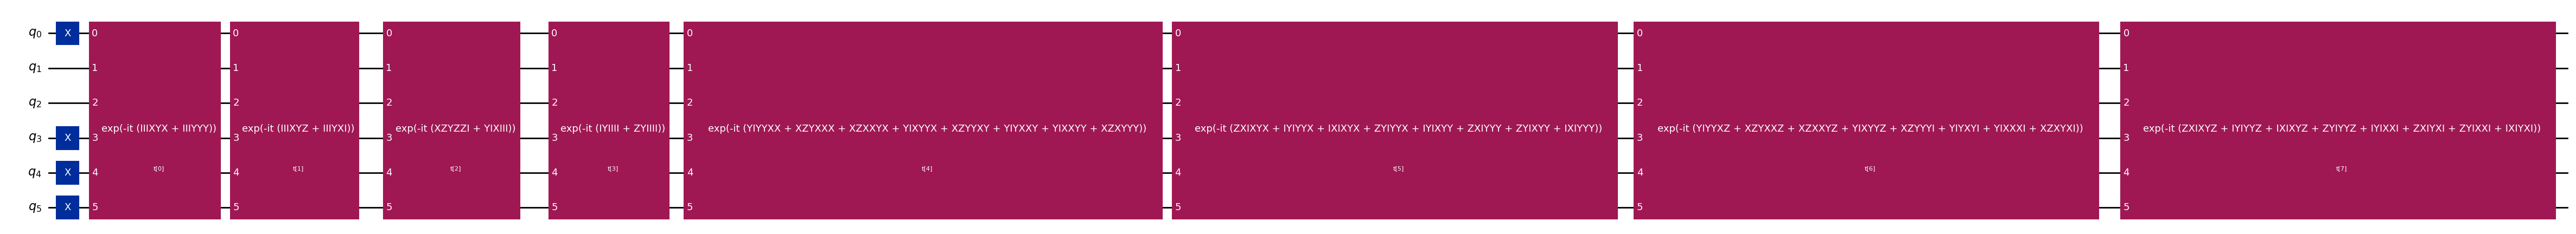

In [5]:
print(f'* Reference state:')
display(qc2data.algorithm.reference_state.draw('mpl'))

print(f'* Ansatz:')
# the option `fold=-1` forces the anzats to fit into the page
display(qc2data.algorithm.ansatz.decompose().draw('mpl', fold=-1))

### Run VQE

In [6]:
results = qc2data.algorithm.run()

iter = 002, energy = -74.964404823994 Ha
iter = 004, energy = -74.964404823994 Ha
iter = 006, energy = -74.964404821877 Ha
iter = 008, energy = -74.964404823994 Ha
iter = 010, energy = -74.953712458779 Ha
iter = 012, energy = -74.969016364134 Ha
iter = 014, energy = -74.969016364134 Ha
iter = 016, energy = -74.969016364311 Ha
iter = 018, energy = -74.969016364250 Ha
iter = 020, energy = -74.969038740061 Ha
iter = 022, energy = -74.969038740061 Ha
iter = 024, energy = -74.969038740061 Ha
iter = 026, energy = -74.969038740061 Ha
iter = 028, energy = -74.969038740220 Ha
iter = 030, energy = -74.969072172816 Ha
iter = 032, energy = -74.969072172816 Ha
iter = 034, energy = -74.969072172813 Ha
iter = 036, energy = -74.969072172797 Ha
iter = 038, energy = -74.969074367841 Ha
iter = 040, energy = -74.969074367841 Ha
iter = 042, energy = -74.969074367841 Ha
iter = 044, energy = -74.969074367841 Ha
iter = 046, energy = -74.969074367844 Ha
=== QISKIT VQE RESULTS ===
* Electronic ground state ener

In [7]:
# print optimized circuit parameters
print(f'* Optimized circuit parameters:')
print(results.optimal_params, "\n")

print(f'* VQE energy (Hartree):')
print(results.optimal_energy, "\n")

# `intermediate_info` saves all data at each optimization step
print(f'* VQE intermediate info:')
results.optimizer_evals, results.energy, results.parameters, results.metadata

* Optimized circuit parameters:
[-0.005355808793988312, -8.38625771153209e-08, -0.00535580955850707, -3.460468216184343e-07, -0.049389432156110066, -3.4748224844750195e-07, -3.296348580325791e-07, -0.030250429826813585] 

* VQE energy (Hartree):
-74.96907436784359 

* VQE intermediate info:


(46,
 [-74.96440482399416,
  -74.96440482399412,
  -74.96440482399414,
  -74.96440482399413,
  -74.96440482399416,
  -74.96440482187742,
  -74.96440482399416,
  -74.96440482399416,
  -74.96440482285412,
  -74.95371245877908,
  -74.96901636424987,
  -74.96901636413423,
  -74.96901636424987,
  -74.96901636413422,
  -74.96901636424987,
  -74.9690163643105,
  -74.96901636424985,
  -74.96901636424985,
  -74.96901636414427,
  -74.96903874006085,
  -74.96903874010222,
  -74.96903874006087,
  -74.96903874010223,
  -74.96903874006087,
  -74.96903873997252,
  -74.96903874006087,
  -74.96903874006087,
  -74.96903874022001,
  -74.96907217279715,
  -74.96907217281557,
  -74.96907217279715,
  -74.96907217281557,
  -74.96907217279715,
  -74.9690721728134,
  -74.96907217279715,
  -74.96907217279715,
  -74.96907217276534,
  -74.96907436784073,
  -74.96907436783057,
  -74.96907436784075,
  -74.96907436783057,
  -74.96907436784075,
  -74.9690743678402,
  -74.96907436784075,
  -74.96907436784076,
  -74.96

### Compare VQE result with classical qchem calculations

Now, let's compare our VQE enery with quantum chemistry calculations performed solely using PySCF. Here is a typical example run:

In [8]:
import pyscf
from pyscf import gto, scf, mcscf, fci

# set up molecule
mol_h2o = gto.M(
    atom='O 0 0 0.1192622641;\
          H 0 0.763237638 -0.4770469398;\
          H 0 -0.763237638, -0.4770469398',
    basis='sto-3g',
    verbose=0
)

# run HF
scf_h2o = scf.HF(mol_h2o)
hf_h2o = mol_h2o.HF().run()

# run CASCI and CASSCF single-point calculations
ncas, nelecas = (3, 4)
energy_casci = mcscf.CASCI(hf_h2o, ncas, nelecas).kernel()
energy_casscf = mcscf.CASSCF(hf_h2o, ncas, nelecas).kernel()

# run FCI single-point calculation
energy_fci = fci.FCI(hf_h2o).kernel()

print('')
print(f'* Final VQE energy (hartree):           {results.optimal_energy:.6f}')
print(f'* Final CASCI/sto-3g energy (hartree):  {energy_casci[0]:.6f}')
print(f'* Final CASSCF/sto-3g energy (hartree): {energy_casscf[0]:.6f}')
print(f'* Final FCI/sto-3g energy (hartree):    {energy_fci[0]:.6f}')


* Final VQE energy (hartree):           -74.969074
* Final CASCI/sto-3g energy (hartree):  -74.969075
* Final CASSCF/sto-3g energy (hartree): -74.976643
* Final FCI/sto-3g energy (hartree):    -75.015429


As expected, our final VQE energy agrees excelently well with the one obtained with PySCF at CASCI level.